# Logistic Regession 예제

</br>

# PIMA 인디언 당뇨병 예측


#### --▶ PIMA Indian Diabetes Dataset

- Data 컬럼의 의미

	<img src="https://github.com/ElaYJ/Study_Machine_Learning/assets/153154981/90c3bc94-23bf-407a-890a-95527a631130" width="50%" height="50%">

In [1]:
import pandas as pd

diabetes = pd.read_csv("../dataset/diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
diabetes = diabetes.astype('float')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


#### --▶ Correlation 확인

- 먼저 Features 사이의 상관관계를 확인한다.

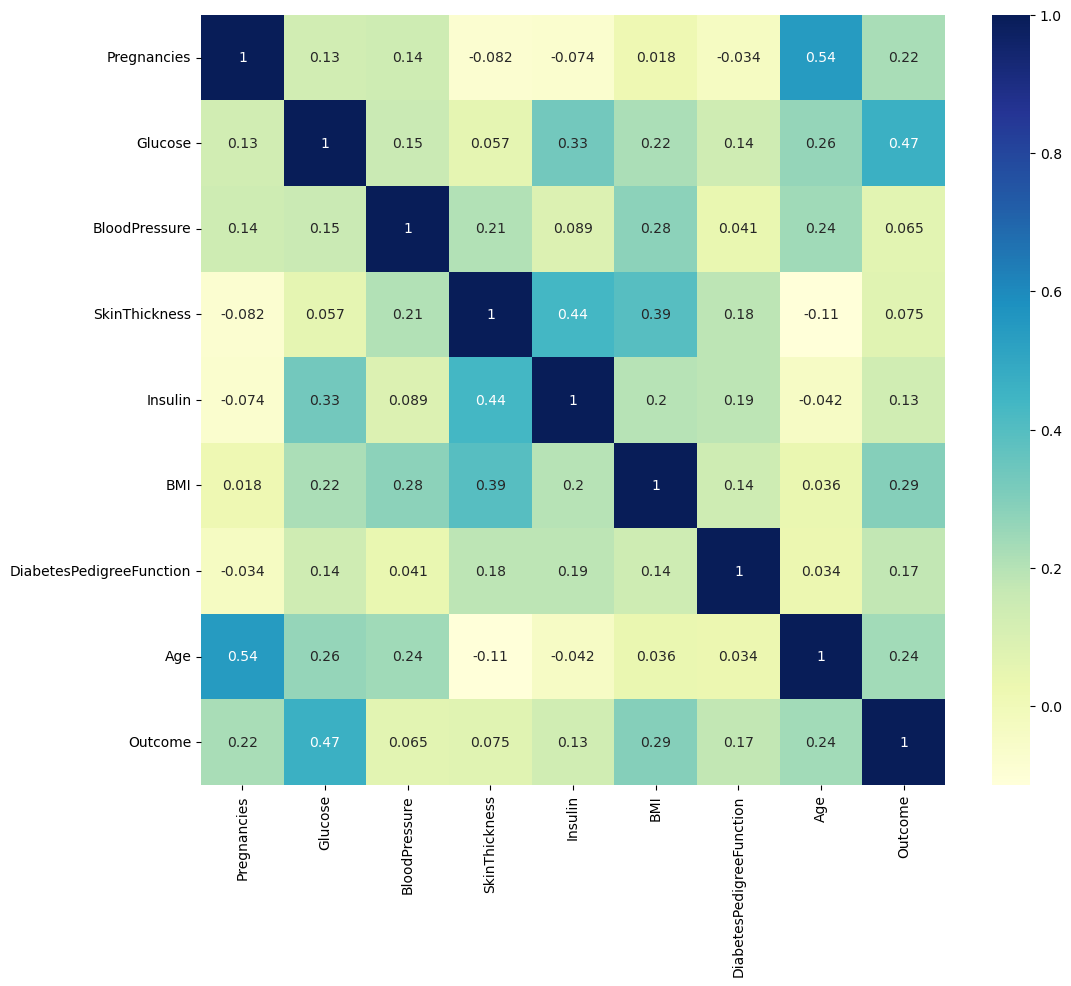

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(diabetes.corr(method='pearson'), annot=True, cmap='YlGnBu')
plt.show()

#### --▶ Missing Value 확인 ⭐

- 데이터 값에 0이 있다.

- 결측치는 데이터에 따라 그 정의가 다르겠지만, 0이라는 숫자가 혈압 특성에 있다는 것은 확실히 문제가 될 수 있다.

- 의학적 지식과 PIMA 인디언에 대한 정보가 없으므로 일단 평균값으로 대체한다.

In [12]:
int(True), int(False)

(1, 0)

In [ ]:
(diabetes==0).astype(int).sum() #--> True, False를 int 1, 0으로 바꿔서 참인 데이터가 몇 개인지 확인

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
zero_features = ['Glucose','BloodPressure','SkinThickness','BMI']
diabetes[zero_features] = diabetes[zero_features].replace(0, diabetes[zero_features].mean())
(diabetes==0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

#### --▶ Split Data

In [8]:
from sklearn.model_selection import train_test_split

X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

#### --▶ Pipeline ⭐

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

estimators = [
	('scaler', StandardScaler()),
	('clf', LogisticRegression(solver='liblinear', random_state=13))
]
pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

#### --▶ Model Evaluation

- 몇 가지 오차 행렬 지표의 수치를 확인해본다.

- 그러나 상대적 의미를 가질 수 없어서 이 수치 자체를 평가할 수는 없다.

In [10]:
from sklearn.metrics import (
	accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
)

print('Accuracy :', accuracy_score(y_test, pred))
print('Recall :', recall_score(y_test, pred))
print('Precision :', precision_score(y_test, pred))
print('AUC score :', roc_auc_score(y_test, pred))
print('f1 score :', f1_score(y_test, pred))

Accuracy : 0.7727272727272727
Recall : 0.6111111111111112
Precision : 0.7021276595744681
AUC score : 0.7355555555555556
f1 score : 0.6534653465346535


#### --▶ 다변수 방정식

$~~~~~~~\large \boxed{\,f(x)=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_3+\theta_4x_4+\theta_5x_5+\theta_6x_6+\theta_7x_7+\theta_8x_8\,}$

- 다변수 방정식의 각 계수 값을 확인한다.

- 8개의 features에 대한 각각의 계수($\,\theta_1\,\sim\,\theta_8\,$)를 구한다.

In [16]:
pipe.steps

[('scaler', StandardScaler()),
 ('clf', LogisticRegression(random_state=13, solver='liblinear'))]

In [17]:
pipe['clf'].coef_

array([[ 0.35426589,  1.20142444, -0.15840136,  0.03394658, -0.16286472,
         0.62040452,  0.36669356,  0.17195965]])

In [13]:
coeff = list(pipe['clf'].coef_[0])
coeff

[0.3542658884412651,
 1.2014244425037581,
 -0.1584013553628671,
 0.03394657712929954,
 -0.16286471953988116,
 0.620404521989511,
 0.36669355795578745,
 0.17195965447035097]

In [14]:
labels = X_train.columns.tolist()
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

#### --▶ Feature 시각화

- 중요한 특성에 대해 그래프로 시각화해서 살펴본다.

In [24]:
features = pd.DataFrame({'Features': labels, 'importance': coeff})
features

,Features,importance
0,Pregnancies,0.354266
1,Glucose,1.201424
2,BloodPressure,-0.158401
3,SkinThickness,0.033947
4,Insulin,-0.162865
5,BMI,0.620405
6,DiabetesPedigreeFunction,0.366694
7,Age,0.171960


In [25]:
features.sort_values(by=['importance'], ascending=True, inplace=True)
features

,Features,importance
4,Insulin,-0.162865
2,BloodPressure,-0.158401
3,SkinThickness,0.033947
7,Age,0.171960
0,Pregnancies,0.354266
6,DiabetesPedigreeFunction,0.366694
5,BMI,0.620405
1,Glucose,1.201424


In [26]:
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features

,importance,positive
Features,,
Insulin,-0.162865,False
BloodPressure,-0.158401,False
SkinThickness,0.033947,True
Age,0.171960,True
Pregnancies,0.354266,True
DiabetesPedigreeFunction,0.366694,True
BMI,0.620405,True
Glucose,1.201424,True


In [28]:
features['positive'].map({True: 'blue', False: 'red'}).to_frame()

,positive
Features,
Insulin,red
BloodPressure,red
SkinThickness,blue
Age,blue
Pregnancies,blue
DiabetesPedigreeFunction,blue
BMI,blue
Glucose,blue


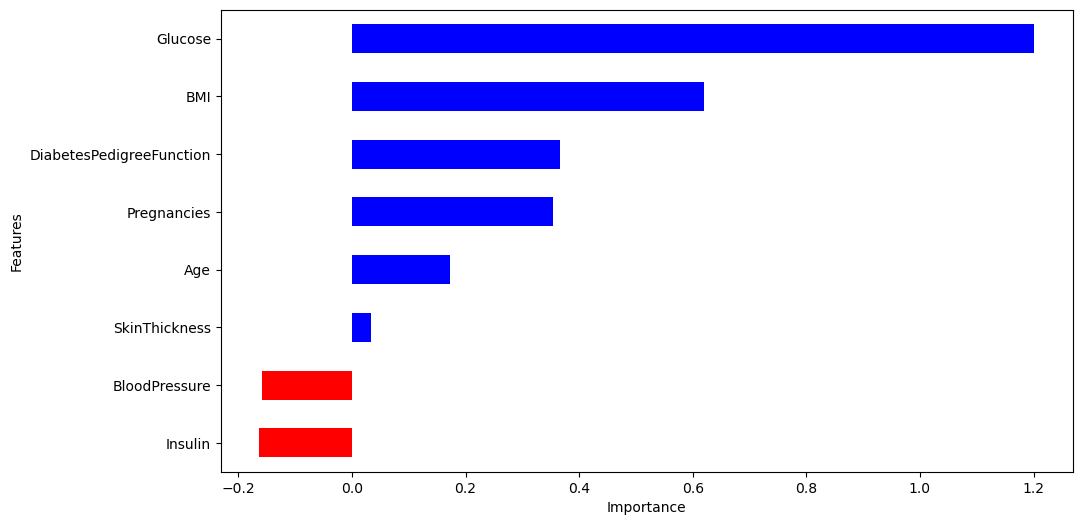

In [29]:
features['importance'].plot(
	kind='barh',
	figsize=(11,6),
	color=features['positive'].map({True: 'blue', False: 'red'})
)

plt.xlabel('Importance')
plt.show()

👉 해석

- 포도당, BMI 등은 당뇨에 영향을 미치는 정도가 높다.

- 혈압은 예측에 부정적 영향을 준다.

- 연령이 BMI보다 츨력 변수와 더 관련되어 있었지만, 모델은 BMI와 Glucose에 더 의존함.

<br></br>

---

## 🔰 다른 방식으로 결측치 처리

#### --> Dataset

In [26]:
import pandas as pd

diabetes = pd.read_csv("../dataset/diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
diabetes = diabetes.astype('float')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


#### --▶ Missing Value 확인

- 먼저 결측치나 이상치가 있는지 데이터를 확인한다.

- 데이터 값이 0일 때 결과에 영향을 줄 수 있을 것으로 생각되는 </br>
	'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin' 컬럼을 살펴본다.

In [28]:
(diabetes==0).astype(int).sum() #--> True, False를 int 1, 0으로 바꿔서 참인 데이터가 몇 개인지 확인

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

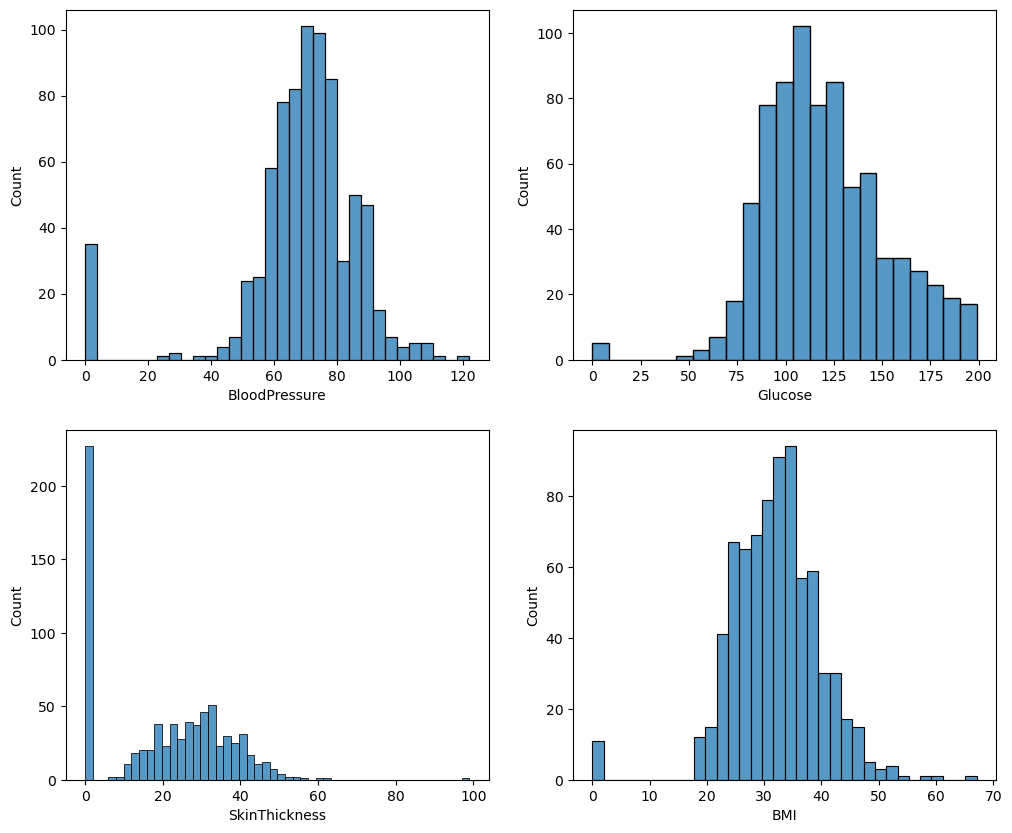

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

sns.histplot(data=diabetes, x='BloodPressure', ax=ax[0][0])
sns.histplot(data=diabetes, x='Glucose', ax=ax[0][1])
sns.histplot(data=diabetes, x='SkinThickness', bins=50, ax=ax[1][0])
sns.histplot(data=diabetes, x='BMI', ax=ax[1][1])

plt.show()

👉 해석

- BloodPressure - 0인 결측치가 관찰되고 그래프 형태로 보아 이상치는 딱히 보이지 않는다.

- SkinThickness - 0인 결측치가 많고, 100에서 이상치가 확인된다.

- Insulin은 결측치가 많아 따로 Outcome 클래스 별로 인슐린 수치를 살펴본다.

🎗 __'Insulin'__

In [30]:
data01 = diabetes.loc[(diabetes['Insulin']!=0), ['Insulin','Outcome']]
data01

,Insulin,Outcome
3,94.0,0.0
4,168.0,1.0
6,88.0,1.0
8,543.0,1.0
13,846.0,1.0
...,...,...
753,510.0,1.0
755,110.0,1.0
760,16.0,0.0
763,180.0,0.0


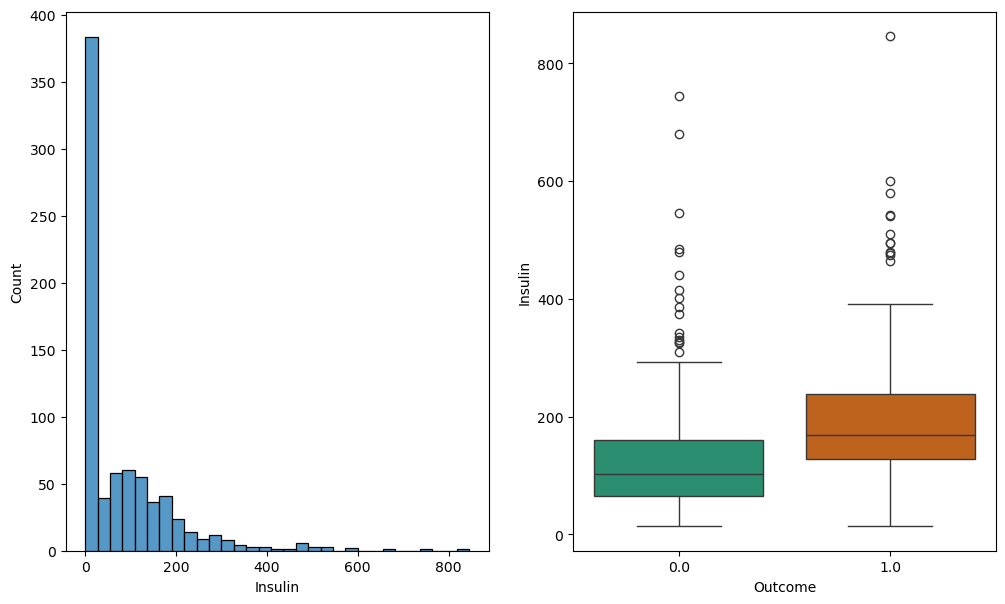

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12,7))

sns.histplot(data=diabetes, x='Insulin', ax=ax[0])
sns.boxplot(data=data01, x='Outcome', y='Insulin', hue='Outcome', legend=False, palette='Dark2', ax=ax[1]);

plt.show()

🎗 __'Glucose'__

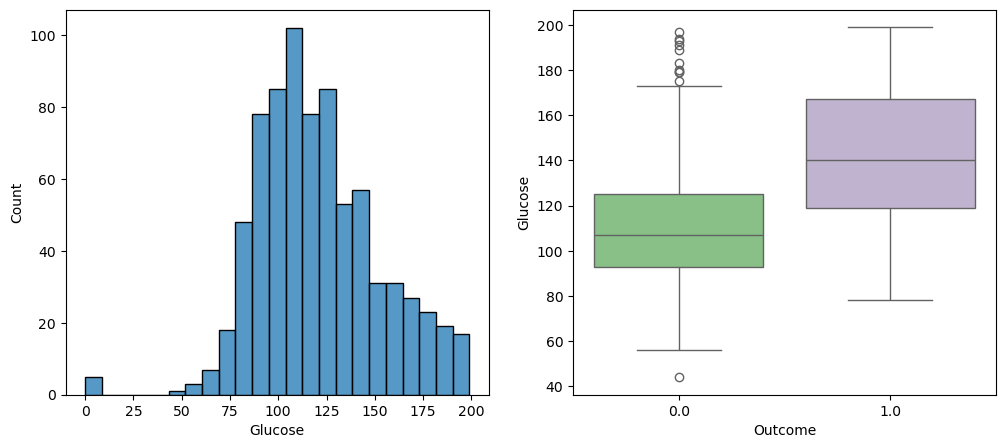

In [32]:
data01 = diabetes.loc[(diabetes['Glucose']!=0), ['Glucose','Outcome']] #'Glucose', 'BloodPressure', 'SkinThickness', 'BMI'

fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(data=diabetes, x='Glucose', ax=ax[0])
sns.boxplot(data=data01, x='Outcome', y='Glucose', hue='Outcome', legend=False, palette='Accent', ax=ax[1]);
plt.show()

🎗 __'BloodPressure'__

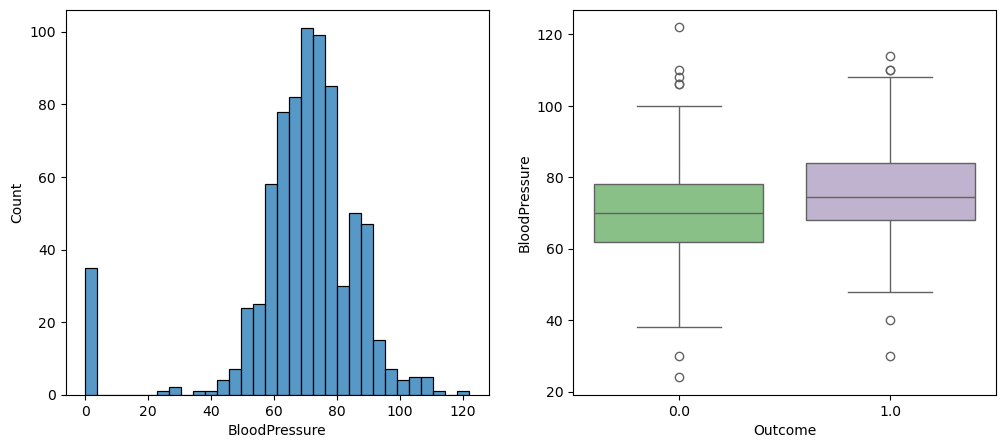

In [33]:
data01 = diabetes.loc[(diabetes['BloodPressure']!=0), ['BloodPressure','Outcome']] #'Glucose', 'BloodPressure', 'SkinThickness', 'BMI'

fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(data=diabetes, x='BloodPressure', ax=ax[0])
sns.boxplot(data=data01, x='Outcome', y='BloodPressure', hue='Outcome', legend=False, palette='Accent', ax=ax[1]);
plt.show()

🎗 __'SkinThickness'__

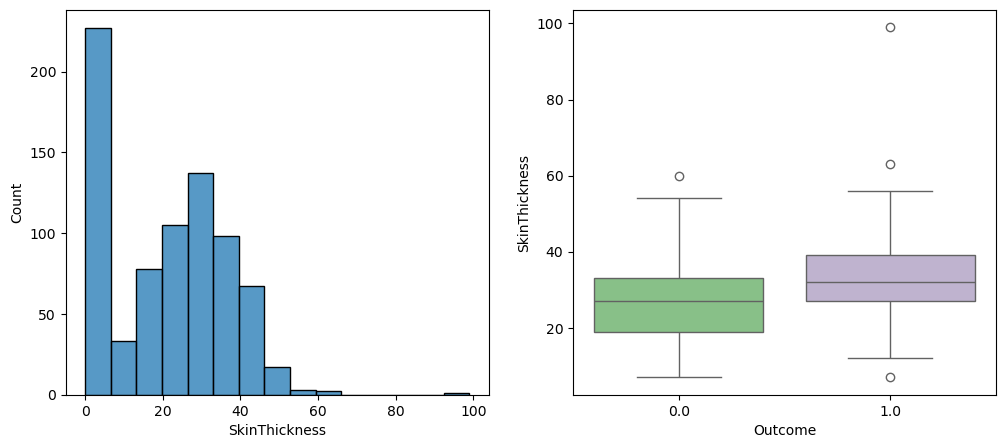

In [34]:
data01 = diabetes.loc[(diabetes['SkinThickness']!=0), ['SkinThickness','Outcome']] #'Glucose', 'BloodPressure', 'SkinThickness', 'BMI'

fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(data=diabetes, x='SkinThickness', ax=ax[0])
sns.boxplot(data=data01, x='Outcome', y='SkinThickness', hue='Outcome', legend=False, palette='Accent', ax=ax[1]);
plt.show()

🎗 __'BMI'__

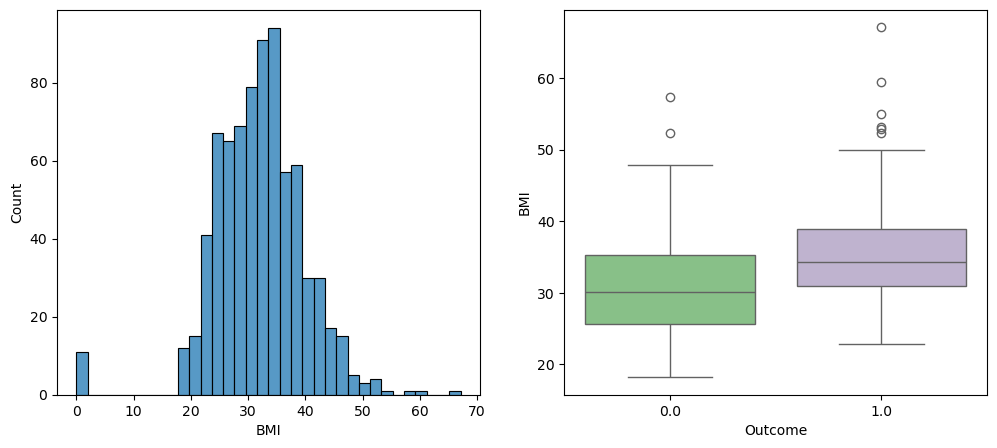

In [35]:
data01 = diabetes.loc[(diabetes['BMI']!=0), ['BMI','Outcome']] #'Glucose', 'BloodPressure', 'SkinThickness', 'BMI'

fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(data=diabetes, x='BMI', ax=ax[0])
sns.boxplot(data=data01, x='Outcome', y='BMI', hue='Outcome', legend=False, palette='Accent', ax=ax[1]);
plt.show()


#### --▶ Missing Value 처리

- 데이터 값이 0일 때 결과에 영향을 줄 수 있을 것으로 생각되는 'Glucose','BloodPressure','SkinThickness','BMI'컬럼의 결측치를 채워준다.

- 'Pregnancies'와 'Outcome'컬럼의 0은 결측치가 아니라 False를 의미하는 결과 값이다.

- 채우는 방식은 전체의 평균이 아니라 Outcome에서 분류된 클래스 별(0 or 1) 각각의 평균으로 0값을 대체한다.

In [36]:
revise_df = diabetes.copy()

In [37]:
(revise_df['Outcome'] == 1)

0       True
1      False
2       True
3      False
4       True
       ...  
763    False
764    False
765    False
766     True
767    False
Name: Outcome, Length: 768, dtype: bool

🎗 __'Glucose'__

In [38]:
revise_df.loc[(revise_df['Outcome'] == 1),'Glucose'].mean()

141.25746268656715

In [39]:
tmp = (revise_df['Glucose'] != 0) & (revise_df['Outcome'] == 1)
revise_df.loc[tmp,'Glucose'].mean()

142.31954887218046

In [40]:
revise_df.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [41]:
cond1 = (revise_df['Glucose'] == 0) & (revise_df['Outcome'] == 1)
cond2 = (revise_df['Glucose'] == 0) & (revise_df['Outcome'] == 0)
cond3 = (revise_df['Glucose'] != 0) & (revise_df['Outcome'] == 1)
cond4 = (revise_df['Glucose'] != 0) & (revise_df['Outcome'] == 0)
revise_df.loc[cond1,'Glucose'] = revise_df.loc[cond3,'Glucose'].mean()
revise_df.loc[cond2,'Glucose'] = revise_df.loc[cond4,'Glucose'].mean()
revise_df.Glucose.describe()

count    768.000000
mean     121.697358
std       30.462008
min       44.000000
25%       99.750000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

🎗 __'BloodPressure'__

In [42]:
tmp = (revise_df['BloodPressure'] != 0) & (revise_df['Outcome'] == 1)
revise_df.loc[(revise_df['Outcome']==1), 'BloodPressure'].mean(), revise_df.loc[tmp, 'BloodPressure'].mean()

(70.82462686567165, 75.32142857142857)

In [43]:
revise_df.loc[(revise_df['Outcome']==1), 'BloodPressure'].median(), revise_df.loc[tmp, 'BloodPressure'].median()

(74.0, 74.5)

In [44]:
cond1 = revise_df['BloodPressure'] == 0
cond2 = revise_df['Outcome'] == 0

revise_df.loc[cond1 & cond2,'BloodPressure'] = revise_df.loc[(~ cond1) & cond2, 'BloodPressure'].median()
revise_df.loc[cond1 & (~ cond2),'BloodPressure'] = revise_df.loc[(~ cond1) & (~ cond2), 'BloodPressure'].median()
revise_df.BloodPressure.describe()

count    768.000000
mean      72.389323
std       12.106039
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

🎗 __'SkinThickness'__

In [45]:
cond1 = revise_df['SkinThickness'] == 0
cond2 = revise_df['Outcome'] == 0

revise_df.loc[cond1 & cond2,'SkinThickness'] = revise_df.loc[(~ cond1) & cond2, 'SkinThickness'].median()
revise_df.loc[cond1 & (~ cond2),'SkinThickness'] = revise_df.loc[(~ cond1) & (~ cond2), 'SkinThickness'].median()
revise_df.SkinThickness.describe()

count    768.000000
mean      29.089844
std        8.890820
min        7.000000
25%       25.000000
50%       28.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

🎗 __'BMI'__

In [46]:
cond1 = revise_df['BMI'] == 0
cond2 = revise_df['Outcome'] == 0

revise_df.loc[cond1 & cond2,'BMI'] = revise_df.loc[(~ cond1) & cond2, 'BMI'].median()
revise_df.loc[cond1 & (~ cond2),'BMI'] = revise_df.loc[(~ cond1) & (~ cond2), 'BMI'].mean()
revise_df.SkinThickness.describe()

count    768.000000
mean      29.089844
std        8.890820
min        7.000000
25%       25.000000
50%       28.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

🎗 __'Insulin'__

In [47]:
cond1 = revise_df['Insulin'] == 0
cond2 = revise_df['Outcome'] == 0

revise_df.loc[cond1 & cond2,'Insulin'] = revise_df.loc[(~ cond1) & cond2, 'Insulin'].mean()
revise_df.loc[cond1 & (~ cond2),'Insulin'] = revise_df.loc[(~ cond1) & (~ cond2), 'Insulin'].mean()
revise_df.SkinThickness.describe()

count    768.000000
mean      29.089844
std        8.890820
min        7.000000
25%       25.000000
50%       28.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [50]:
(revise_df==0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

#### --▶ Split Data

In [51]:
from sklearn.model_selection import train_test_split

X = revise_df.drop(columns=['Outcome'])
y = revise_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

#### --▶ Pipeline ⭐

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

estimators = [
	('scaler', StandardScaler()),
	('clf', LogisticRegression(solver='liblinear', random_state=13))
]
pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

#### --▶ Model Evaluation

- 전체 평균으로 결측치를 채운 데이터 값

	- Accuracy : 0.7727272727272727
	
	- Recall : 0.6111111111111112
	- Precision : 0.7021276595744681
	- AUC score : 0.7355555555555556
	- f1 score : 0.6534653465346535

In [53]:
from sklearn.metrics import (
	accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
)

print('Accuracy :', accuracy_score(y_test, pred))
print('Recall :', recall_score(y_test, pred))
print('Precision :', precision_score(y_test, pred))
print('AUC score :', roc_auc_score(y_test, pred))
print('f1 score :', f1_score(y_test, pred))

Accuracy : 0.7987012987012987
Recall : 0.6666666666666666
Precision : 0.7346938775510204
AUC score : 0.7683333333333333
f1 score : 0.6990291262135923


#### --▶ Feature 시각화

- 중요한 특성에 대해 그래프로 시각화해서 살펴본다.

- 중요도는 다변수 방정식의 계수 값으로 한다.

$~~~~~~~\large \boxed{\,f(x)=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_3+\theta_4x_4+\theta_5x_5+\theta_6x_6+\theta_7x_7+\theta_8x_8\,}$

- 8개의 features에 대한 각각의 계수($\,\theta_1\,\sim\,\theta_8\,$)를 구한다.

In [54]:
coeff = list(pipe['clf'].coef_[0])
coeff

[0.31953033937973435,
 0.8905478640123566,
 -0.08923580084126526,
 0.3696554468628848,
 0.7103397720049488,
 0.3400181346184975,
 0.3494121218726697,
 0.18550474509925013]

In [55]:
labels = X_train.columns.tolist()
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [60]:
features = pd.DataFrame({'Features': labels, 'importance': coeff})
features

,Features,importance
0,Pregnancies,0.319530
1,Glucose,0.890548
2,BloodPressure,-0.089236
3,SkinThickness,0.369655
4,Insulin,0.710340
5,BMI,0.340018
6,DiabetesPedigreeFunction,0.349412
7,Age,0.185505


In [61]:
features.sort_values(by=['importance'], ascending=True, inplace=True)
features

,Features,importance
2,BloodPressure,-0.089236
7,Age,0.185505
0,Pregnancies,0.319530
5,BMI,0.340018
6,DiabetesPedigreeFunction,0.349412
3,SkinThickness,0.369655
4,Insulin,0.710340
1,Glucose,0.890548


In [62]:
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features

,importance,positive
Features,,
BloodPressure,-0.089236,False
Age,0.185505,True
Pregnancies,0.319530,True
BMI,0.340018,True
DiabetesPedigreeFunction,0.349412,True
SkinThickness,0.369655,True
Insulin,0.710340,True
Glucose,0.890548,True


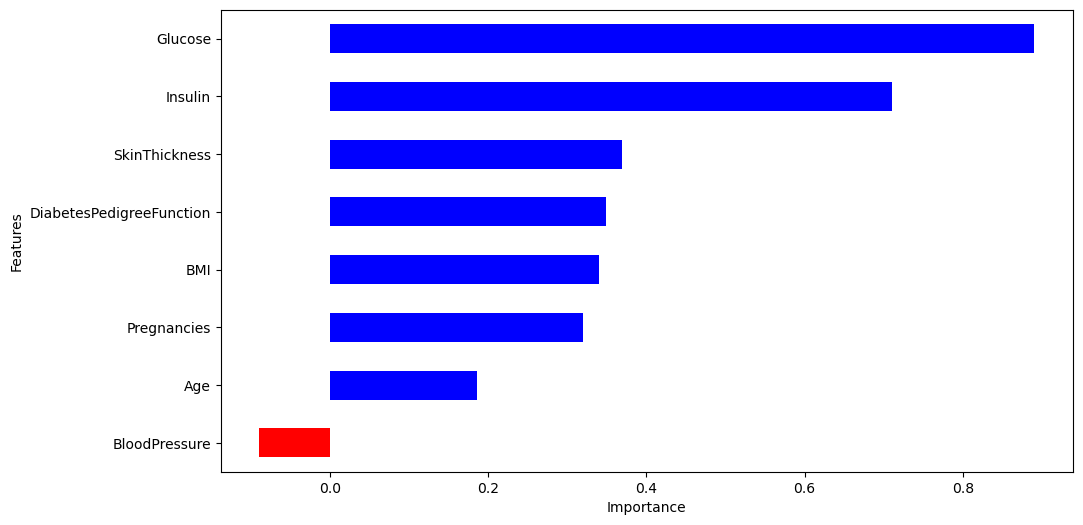

In [63]:
features['importance'].plot(
	kind='barh',
	figsize=(11,6),
	color=features['positive'].map({True: 'blue', False: 'red'})
)

plt.xlabel('Importance')
plt.show()